# 1) Coleta de Dados IPEA DATA

Os dados do PIB real foram coletados de duas formas, uma via download direto do arquivo excel e outra de uma API que traz os dados mais atualiados.


=> http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=38414

## 1.1) Dados Planilha

In [86]:
# A planilha está na pasta dados.

import os
import pandas as pd
diretorio = os.path.dirname(os.getcwd())
local_arquivo = os.path.join(diretorio, 'dados', 'PIB preços Basico e Preços de Mercado Deflacionados IPCA.xls')

#abrindo o arquivo em dataframe no pandas
dataframe = pd.read_excel(local_arquivo)

#selecionando a coluna PIB a preços de marcado deflacionado pelo IPCA
pib_pm_deflacionado_ipca = dataframe['PIB  precos de mercado IPCA']

#As datas dos arquivo ipeadata não são reconhecidos como data pelo python.
#Abaixo crio uma serie de datas trimestrais e a incluo como indice (index) do dataframe pib_pm_deflacionado_ipca
index = pd.date_range('1996-03', periods=len(pib_pm_deflacionado_ipca), freq='Q')
pib_pm_deflacionado_ipca.index = index

#descomente a linha abaixo pra printar a serie
#pib_pm_deflacionado_ipca

# 2) Dessazonalizar Série

Abaixo coloquei a documentação do ajuste de sazonalidade x13
https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_analysis.html

In [93]:
# Pacote statsmodels que possui o x13
import statsmodels as sm

#precisei baixar um arquivo do site census pra poder a ajuste ser feito
#abaixo esta o site e o stackoverflow tirando duvidas sobre como fazer funcionar o ajuste no pyhton
#https://www.census.gov/srd/www/x13as/
#https://stackoverflow.com/questions/32053770/arima-seasonal-prediction-with-python-x12a-and-x13as-not-found-on-path

#coloquei o aquivo no numa pasta chamada x13 dentro do diretorio do notebook
local_x13_seassonal_file = os.path.join(diretorio, 'notebook','x13', 'x13as')

#execução do ajuste
pib_pm_deflacionado_ipca_dessazonalizado = sm.tsa.x13.x13_arima_analysis(pib_pm_deflacionado_ipca,x12path=local_x13_seassonal_file)


#Descomente para printar o ajuste
#pib_pm_deflacionado_ipca_dessazonalizado.seasadj


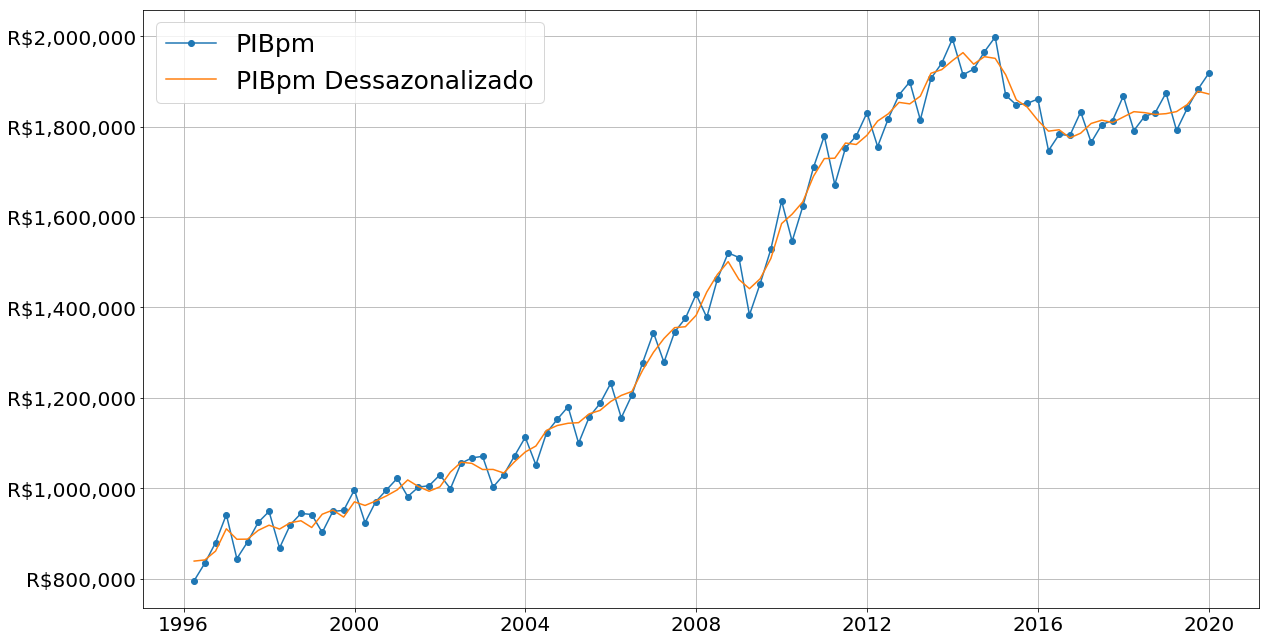

In [116]:
#pacotes de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages
fmt = 'R${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)


#Iniciando os gráfico e fazendo configurações globais
fig, ax = plt.subplots(figsize=(20,11))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Plot da Serie original
ax.plot(pib_pm_deflacionado_ipca.index,
        pib_pm_deflacionado_ipca.values,'-o',label='PIBpm')

# Plot da Serie Com Ajusta Sazonal
ax.yaxis.set_major_formatter(tick) 
ax.plot(pib_pm_deflacionado_ipca_dessazonalizado.seasadj.index,
        pib_pm_deflacionado_ipca_dessazonalizado.seasadj.values,label='PIBpm Dessazonalizado')



# Adicionando linhas verticais e horizontais
ax.grid(True)

# Adicionando as legndas
ax.legend(loc="upper left",fontsize=25)
